In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.2)

In [3]:
train=training_datagenarator.flow_from_directory('D:\FIRE NO FIRE SET',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory('D:\FIRE NO FIRE SET',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation')

Found 958 images belonging to 2 classes.
Found 238 images belonging to 2 classes.


In [4]:
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [6]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r"D:\models\fire_nofire_model.h5",
                                             monitor="val_loss",mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [8]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit(train,validation_data=validation,epochs=10,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

Epoch 1/10
59/59 [==============================] - 128s 2s/step - loss: 0.2810 - accuracy: 0.9214 - val_loss: 0.2400 - val_accuracy: 0.9196
Epoch 2/10
59/59 [==============================] - 126s 2s/step - loss: 0.1965 - accuracy: 0.9204 - val_loss: 0.1727 - val_accuracy: 0.9330
Epoch 3/10
59/59 [==============================] - 136s 2s/step - loss: 0.1935 - accuracy: 0.9193 - val_loss: 0.2412 - val_accuracy: 0.9241
Epoch 4/10
59/59 [==============================] - 113s 2s/step - loss: 0.2128 - accuracy: 0.9204 - val_loss: 0.2301 - val_accuracy: 0.9330
Epoch 5/10
59/59 [==============================] - 115s 2s/step - loss: 0.1902 - accuracy: 0.9204 - val_loss: 0.1796 - val_accuracy: 0.9286
Epoch 6/10
59/59 [==============================] - 121s 2s/step - loss: 0.1952 - accuracy: 0.9193 - val_loss: 0.1731 - val_accuracy: 0.9241
Epoch 7/10
59/59 [==============================] - 117s 2s/step - loss: 0.1756 - accuracy: 0.9193 - val_loss: 0.1524 - val_accuracy: 0.9241
Epoch 8/10
59

In [29]:
from tensorflow.keras.models import load_model
cnn=load_model(r"D:\models\fire_nofire_model.h5")

In [30]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [43]:
image_for_testing = r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot (125).png"

1/1 [==============================] - 0s 120ms/step


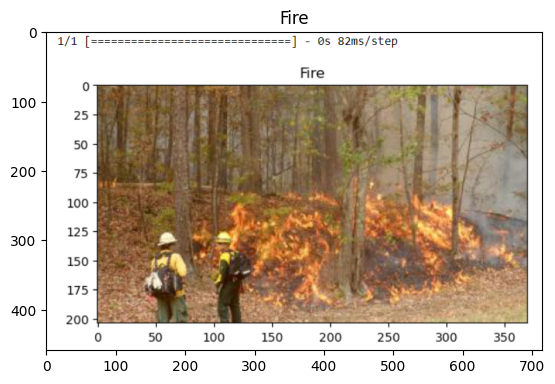

In [44]:
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=(cnn.predict(test_image) > 0.5).astype("int32")
#classes_x = np.argmax(result,axis=-1)

Catagories=['Fire','NoFire']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()